In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [3]:
mouseFile = "data/Mouse_metadata.csv"
studyFile = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouseFile)
study_results = pd.read_csv(studyFile)

In [4]:
# Combine the two files
mouse_df = pd.DataFrame(mouse_metadata)
study_df = pd.DataFrame(study_results)

df = pd.merge(mouse_df, study_df, on="Mouse ID")
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics
Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor valume for each regimen. 

In [5]:
sumStat_df = df.loc[:,["Drug Regimen", "Tumor Volume (mm3)"]].rename(columns = {"Tumor Volume (mm3)":"Mean"})
sumStat_df["Median"] = sumStat_df["Mean"]
sumStat_df["StDev"] = sumStat_df["Mean"]
sumStat_df["Variance"] = sumStat_df["Mean"]
sumStat_df["SEM"] = sumStat_df["Mean"]
sumStat_df = sumStat_df.groupby(["Drug Regimen"], as_index=False).agg({"Mean":"mean", "Median":"median","StDev":"std", "Variance":"var", "SEM":"sem"})
sumStat_df

,Drug Regimen,Mean,Median,StDev,Variance,SEM
0,Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
1,Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
2,Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
3,Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
4,Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
5,Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
6,Propriva,52.322552,50.854632,6.507770,42.351070,0.512884
7,Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
8,Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111
9,Zoniferol,53.236507,51.818479,6.966589,48.533355,0.516398


## Bar Plot - Pandas
Generate a bar plot showing number of data points for each treatment regimen using pandas

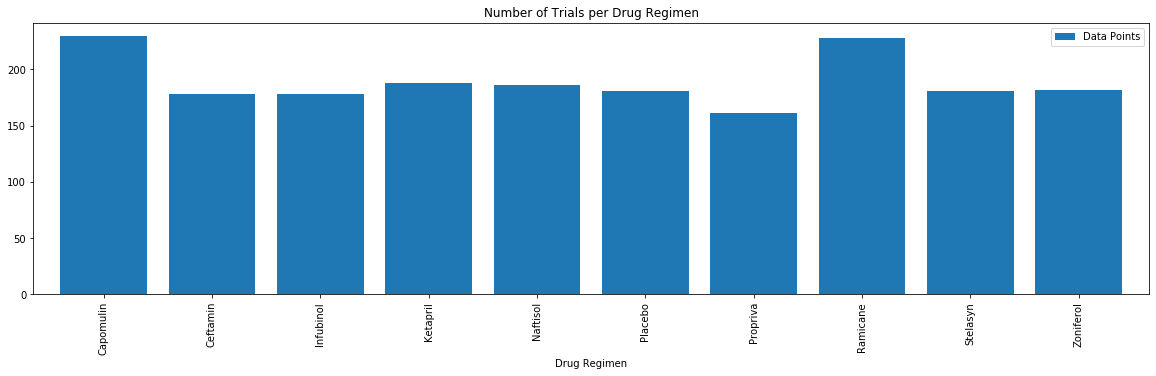

In [6]:
bar_df = df.loc[:, ["Mouse ID", "Drug Regimen"]].rename(columns = {"Mouse ID" : "Data Points"})
pdBar_df = bar_df
pdBar_df = pdBar_df.groupby(["Drug Regimen"], as_index = True).agg({"Data Points":"count"})
pdBar_df.plot(kind = "bar", figsize=(20,5), title="Number of Trials per Drug Regimen", width=.8)
pdBar_df.plot

## Bar Plot - Pyplot
Generate a bar plot showing number of data points for each treatment regimen using Pyplot

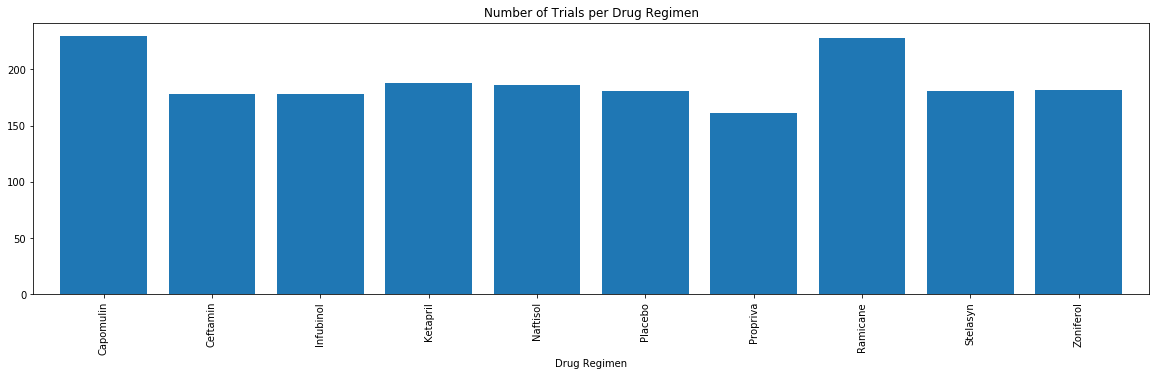

In [7]:
pltBar_df = bar_df
pltBar_df = pltBar_df.groupby(["Drug Regimen"], as_index=False).agg({"Data Points":"count"})
x_axis = np.arange(len(pltBar_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(20,5))
plt.bar(x_axis, pltBar_df["Data Points"], align="center")
plt.xticks(tick_locations, pltBar_df["Drug Regimen"], rotation="vertical")
plt.title("Number of Trials per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.xlim(-.65, len(pltBar_df["Drug Regimen"])-.35)
plt.show()


## Pie Plot - Pandas
Generate a pie plot showing the distribution of female versus male mice using pandas

In [19]:
# Create the dataframe, then split them up
pie_df = df.loc[:, ["Mouse ID", "Sex"]].rename(columns={"Mouse ID":"Count"})
pie_df = pie_df.groupby(pie_df["Sex"], as_index=False).agg({"Count":"count"})
pltPie_df = pie_df
pdPie_df = pie_df
pie_df

,Sex,Count
0,Female,935
1,Male,958


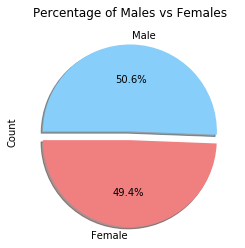

In [50]:
explode = (0.1, 0)
plot = pdPie_df.plot.pie(
    y="Count", 
    startangle=180, 
    explode=explode, 
    labels=pltPie_df["Sex"], 
    shadow=True, 
    colors=["lightcoral", "lightskyblue"], 
    autopct="%1.1f%%", 
    title="Percentage of Males vs Females",
    legend=False
    )

## Pie Plot - Pyplot
Generate a pie plot showing the distribution of female versus male mice using Pyplot

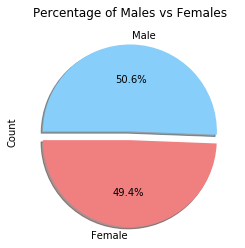

In [51]:
colors = ["lightcoral", "lightskyblue"]
explode = (0.1, 0)

plt.pie(
    pltPie_df["Count"], 
    explode=explode, 
    labels=pltPie_df["Sex"], 
    colors=colors, 
    autopct="%1.1f%%", 
    shadow=True, 
    startangle=180
    )
plt.title("Percentage of Males vs Females")
plt.ylabel("Count")
plt.show()

## Quartiles, outliers and boxplots

Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and scatter plots

Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen